### Part 1: Visualisation using Matplotlib, Seaborn & Folium

In [26]:

# Install packages
%pip install seaborn
%pip install folium
%pip install pandas
%pip install numpy


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:

# Import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import warnings



# Importing Data


In [3]:

# Import dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [4]:

df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [5]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [6]:

df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')


# Creating Visualizations for Data Analysis

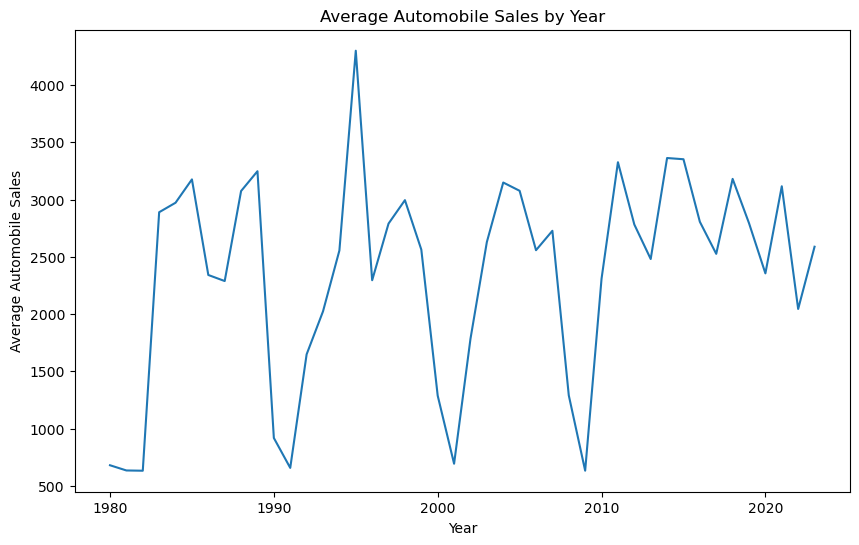

In [7]:

# TASK 1.1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year
# Create data for line plot
df_line = df.groupby(['Year'])['Automobile_Sales'].mean()
plt.figure(figsize=(10,6))
df_line.plot()
plt.title('Average Automobile Sales by Year')
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
#plt.grid()
plt.show()

Include the following on the plot¶ 
ticks on x- axis with all the years, to identify the years of recession
annotation for at least two years of recession
Title as Automobile Sales during Recession

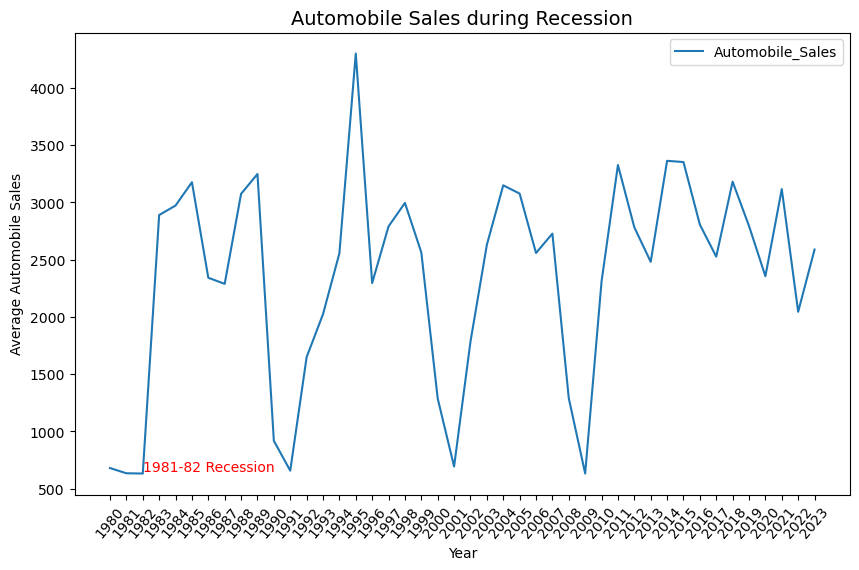

In [8]:
# Plot with annotations
df_line = df.groupby(['Year'])['Automobile_Sales'].mean()
plt.figure(figsize=(10,6))
df_line.plot()
plt.xlabel('Year')
plt.xticks(ticks=np.arange(1980, 2024), rotation=50)
plt.ylabel('Average Automobile Sales')
plt.title('Automobile Sales during Recession', fontsize=14)
plt.text(1982, 650, "1981-82 Recession", fontsize=10, color='red')
plt.legend()

plt.show()

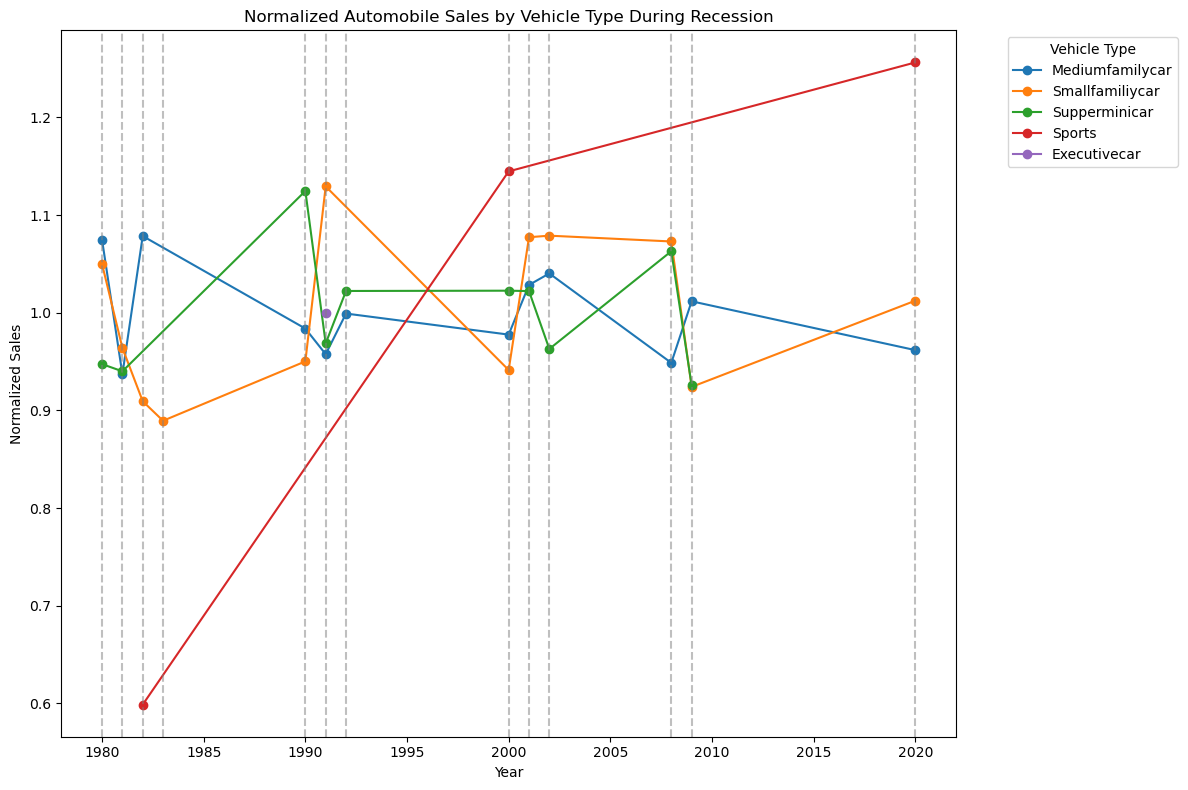

In [9]:

# TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question.
# Is there a noticeable difference in sales trends between different vehicle types during recession periods?

# Create data for line plot
df_rec = df[df['Recession'] == 1]

# Calculate the average automobile sales by year and vehicle type during the recession
df_Mline = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# Calculate the normalized sales by dividing by the average sales for each vehicle type
df_Mline['Normalized_Sales'] = df_Mline.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x: x / x.mean())

# Set the 'Year' as the index
df_Mline.set_index('Year', inplace=True)

# Create the plot for each vehicle type
plt.figure(figsize=(12, 8))
for vehicle_type in df_Mline['Vehicle_Type'].unique():
    data = df_Mline[df_Mline['Vehicle_Type'] == vehicle_type]
    plt.plot(data.index, data['Normalized_Sales'], label=vehicle_type, marker='o')

# Highlight recession years
recession_years = df_rec['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)

# Add labels, legend, and title
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Normalized Sales")
plt.xlabel("Year")
plt.title("Normalized Automobile Sales by Vehicle Type During Recession")

# Show the plot
plt.tight_layout()
plt.show()


From the above plot, what insights have you gained on the sales of various vehicle types?
Type in your answer below:¶


Inference: Sports cars and supermini cars demonstrate resilience or growth during recession periods.Medium family cars and, to a lesser extent, small family cars show more sensitivity to economic changes, with less consistent trends.The upward trend in sports vehicles sales indicates the stability of the luxury market, even during economic downturns.

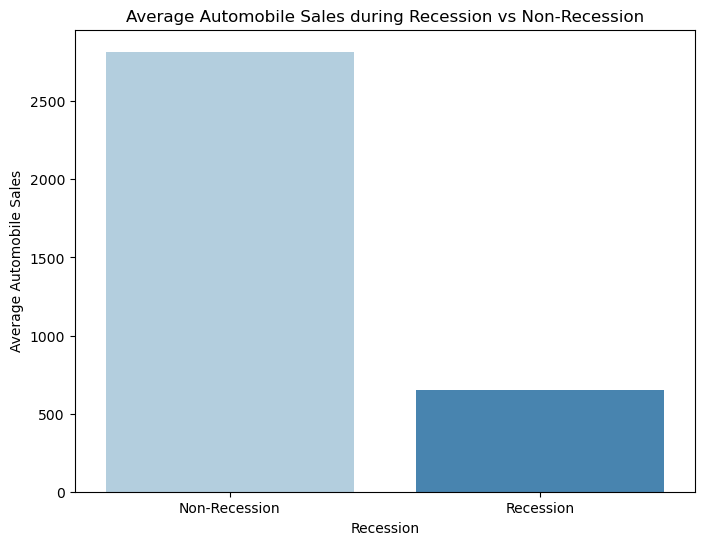

In [10]:
# TASK 1.3: Use the functionality of Seaborn Library to create a visualization.
# Compare the sales trend per vehicle type for a recession period with a non-recession period.

# Create new data for plotting
new_df = df.groupby("Recession")["Automobile_Sales"].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data = new_df, x="Recession", y="Automobile_Sales", palette="Blues")
plt.title("Average Automobile Sales during Recession vs Non-Recession")
plt.xlabel("Recession")
plt.ylabel("Average Automobile Sales")
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])

# show the plot
plt.show()

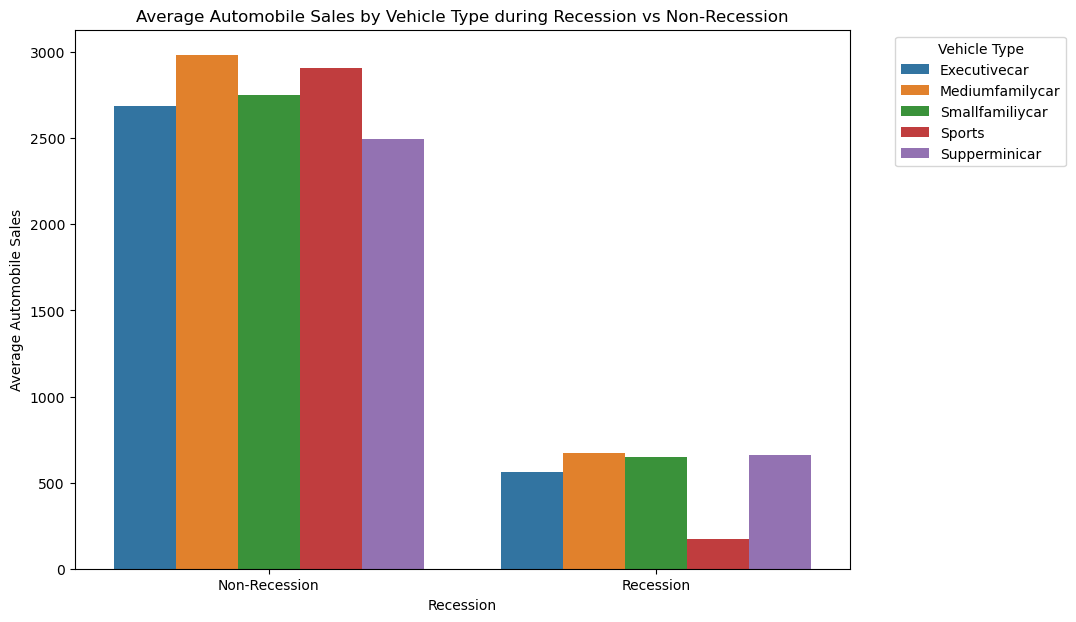

In [11]:

# Compare the sales of different vehicle types during a recession and a non-recession period
# Create data for vehicle type bar plot
vehicle_df = df.groupby(["Recession", "Vehicle_Type"])["Automobile_Sales"].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 7))
sns.barplot(data=vehicle_df, x="Recession", y="Automobile_Sales", hue="Vehicle_Type")
plt.title("Average Automobile Sales by Vehicle Type during Recession vs Non-Recession")
plt.xlabel("Recession")
plt.ylabel("Average Automobile Sales")
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# show the plot
plt.show()


From the above chart what insights have you gained on the overall sales of automobiles during recession?

Inference: From the graph, it is evident that automobile sales are generally lower during recession periods compared to non-recession periods.  This indicates that economic downturns have a negative impact on automobile sales, likely due to reduced consumer spending and financial uncertainty.   

In [12]:

# TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.
# Plot a two line charts using subplotting to answer:-
#       How did the GDP vary over time during recession and non-recession periods?

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

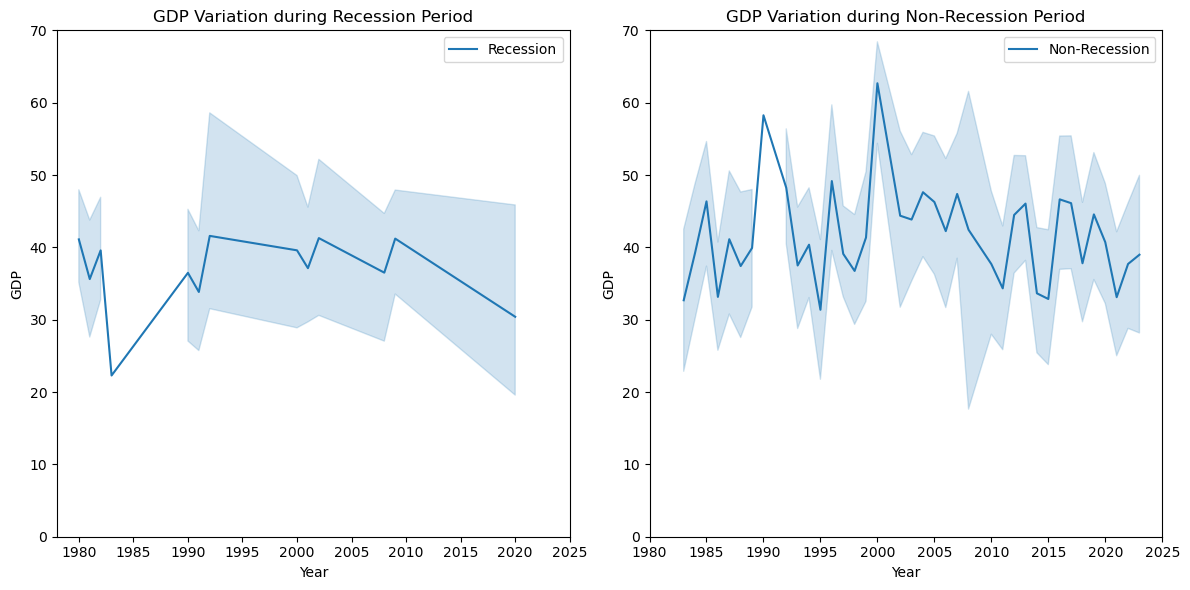

In [13]:
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]
    
#Figure
fig=plt.figure(figsize=(12, 6))
    
#Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). 
    
#plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_xticks(ticks=np.arange(1980, 2026, 5))
ax0.set_ylabel('GDP')
ax0.set_ylim(0, 70)
ax0.set_title('GDP Variation during Recession Period')
    
#plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_xticks(ticks=np.arange(1980, 2026, 5))
ax1.set_ylabel('GDP')
ax1.set_ylim(0, 70)
ax1.set_title('GDP Variation during Non-Recession Period')
    
plt.tight_layout()
plt.show()

#------------------------------------------------Alternatively--------------
#Using subplot()
# plt.figure(figsize=(............, ..........))
    
#subplot 1
# plt.subplot(1, 2, 1)
# sns.lineplot(x='.........', y='......', data=.........., label='......')
# plt.xlabel('.......')
# plt.ylabel('..........')
# plt.legend()

#subplot 1
# plt.subplot(1, 2, 2)
# sns.lineplot(x='.........', y='......', data=.........., label='......')
# plt.xlabel('.......')
# plt.ylabel('..........')
# plt.legend()
    
# plt.tight_layout()
# plt.show()

Inference

From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company

In [14]:
# Task 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
# How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend
# Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble
# Title this plot as 'Seasonality impact on Automobile Sales'

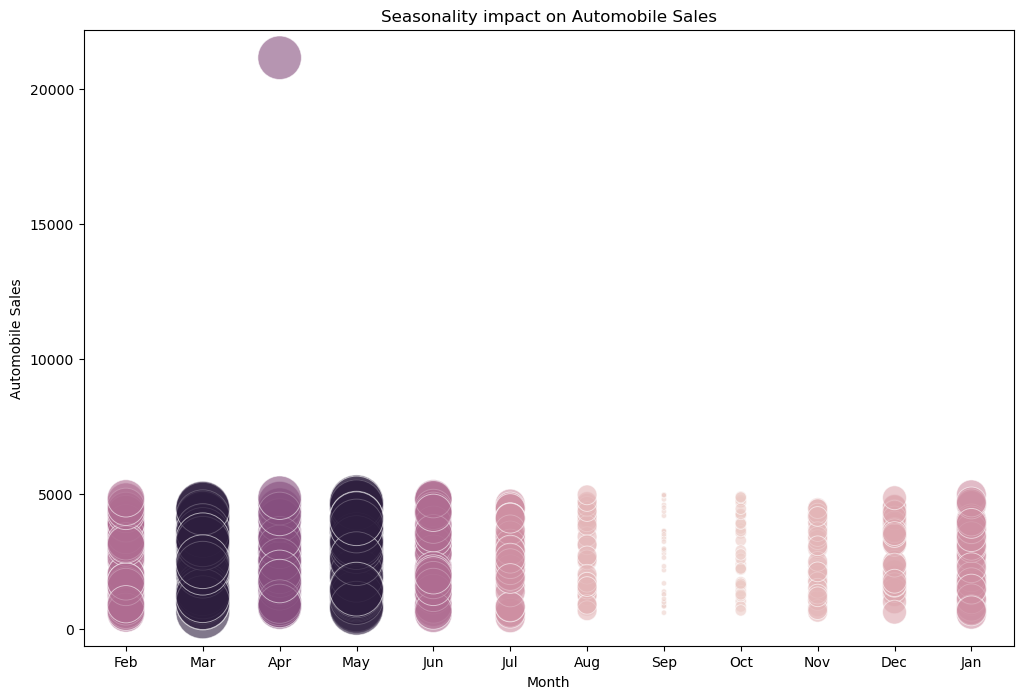

In [15]:
# Create data for bubble plot
non_rec_data = df[df['Recession'] == 0]
size = non_rec_data['Seasonality_Weight'] * 100  # for bubble effect & Scale the size for better visibility

#Figure
fig=plt.figure(figsize=(12, 8))
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight', legend=False, sizes=(15, 1500), alpha=0.6)
plt.title('Seasonality impact on Automobile Sales')
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
# plt.ylim(0, 25000)
# plt.legend()  # Not needed since legend=False is set in sns.scatterplot
plt.show()


Inference
From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April


In [16]:
# TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period?
# From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period?
# Title this plot as 'Consumer Confidence and Automobile Sales during Recessions'

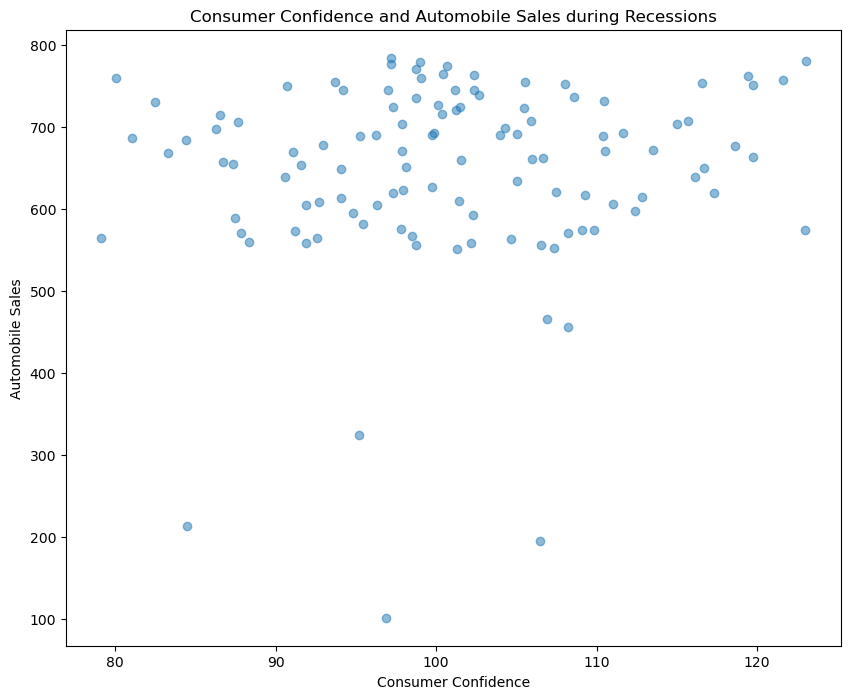

In [17]:
# Create data for scatter plot
rec_data = df[df['Recession'] == 1]

#Figure
fig=plt.figure(figsize=(10, 8))
plt.scatter(data=rec_data, x='Consumer_Confidence', y='Automobile_Sales', alpha=0.5) 
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.show()

Inference: The scatter plot indicates no correlation between consumer confidence and automobile sales during recession periods.


In [18]:
# Task 1.7 Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
# How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods?

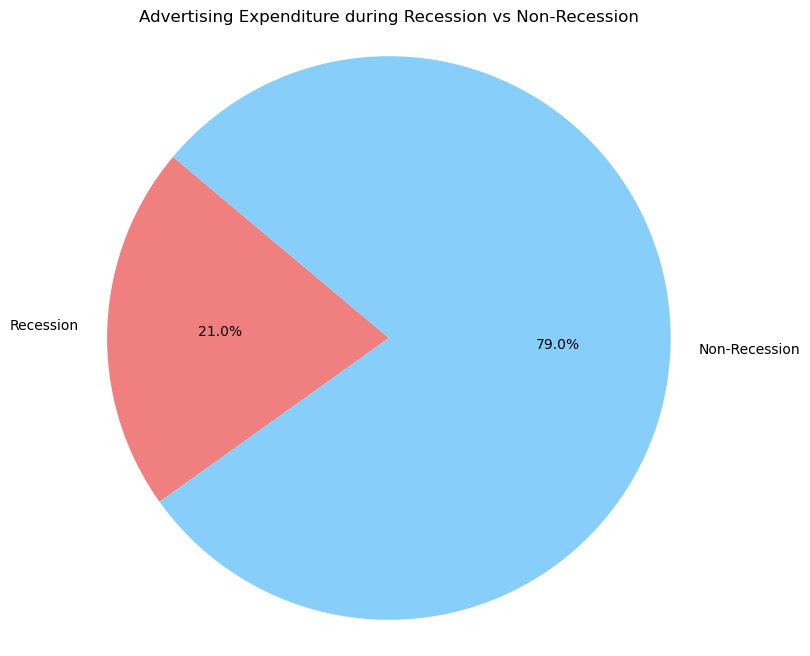

In [19]:
# Create recession dataframe for pie chart
rec_df = df[df['Recession'] == 1]
non_rec_df = df[df['Recession'] == 0]   

# Calculate total advertising expenditure for recession and non-recession periods
rec_adv_exp = rec_df['Advertising_Expenditure'].sum()
non_rec_adv_exp = non_rec_df['Advertising_Expenditure'].sum()   

# Create pie chart for advertising expenditure
plt.figure(figsize = (8, 8))

labels = ['Recession', 'Non-Recession']
sizes = [rec_adv_exp, non_rec_adv_exp]
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Advertising Expenditure during Recession vs Non-Recession')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



Inference: XYZAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times.

In [20]:
# Task 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.
# Title this plot as 'Share of Each Vehicle Type in Total Expenditure during Recessions'

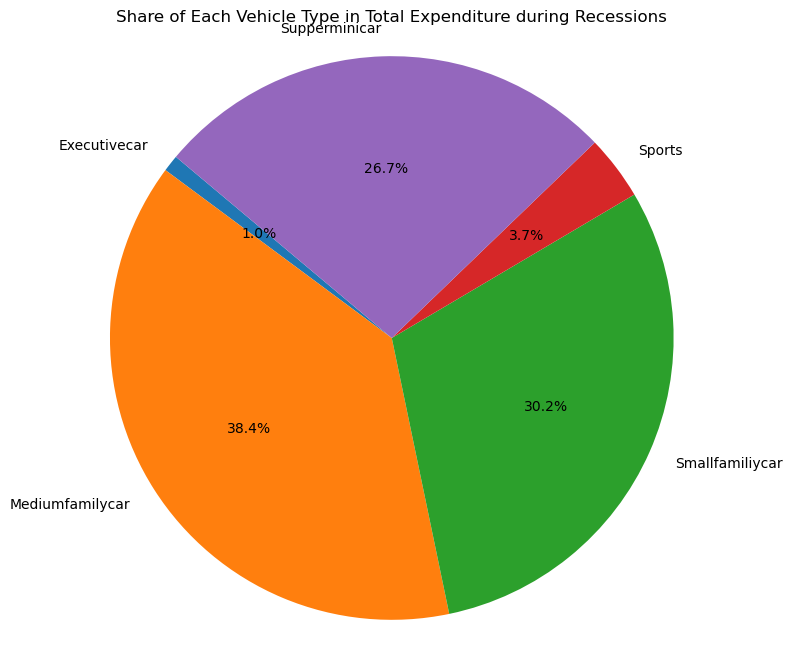

In [21]:
# Create recession dataframe for pie chart
rec_df = df[df['Recession'] == 1]

# Group by vehicle type and sum of the advertising expenditure during recession period
rec_vehicle_exp = rec_df.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create pie chart for advertising expenditure by vehicle type during recession period
plt.figure(figsize = (8, 8))
labels = rec_vehicle_exp.index
sizes = rec_vehicle_exp.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Share of Each Vehicle Type in Total Expenditure during Recessions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Inference: During recession the advertisements were mostly focued on low price range vehicle. A wise decision!

In [22]:
# Task 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
# Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period.
# Create a lineplot and title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


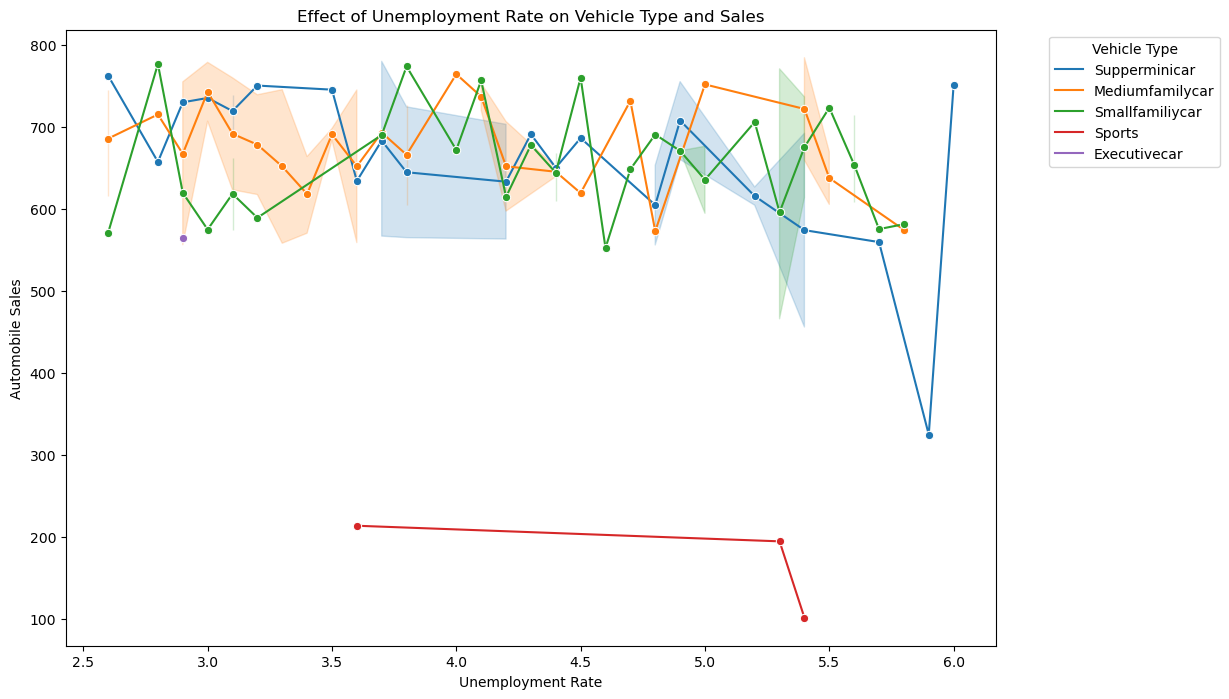

In [23]:
# Create dataframe for re
rec_data = df[df['Recession'] == 1]

# Create the line plot using seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(data=rec_data, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', marker='o')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()  

Inference: During recession, buying pattern changed, the sales of low range vehicle like superminicar increases as unemployment rate rise.

In [24]:
# OPTIONAL : TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period
%pip install requests

import requests

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
filename = "us-states.json"

response = requests.get(url)
if response.status_code == 200:
    with open(filename, "wb") as f:
        f.write(response.content)
else:
    print("Failed to download the file.")


Note: you may need to restart the kernel to use updated packages.


In [25]:
# Create recession dataframe for map
df = df[df['Recession'] == 1]

# Filter data for recession period and group by region to get total sales
rec_region_sales = df[df['Recession'] == 1].groupby('City', as_index=False)['Automobile_Sales'].sum()

# Create base map centered around the US
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a choropleth map to visualize sales by City using Folium
choropleth = folium.Choropleth(
    geo_data='us-states.json', # GeoJSON file for US states
    data = rec_region_sales,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name', # Adjust this based on the GeoJSON structure
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total Automobile Sales during Recession'
).add_to(map1)  

# Add tooltips to show city names and sales
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(['name'], labels=True))

# Display the map
map1